## Лабораторная работа №2 "РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ МЕТОДОМ РАЗНОСТНЫХ АППРОКСИМАЦИЙ"

`coeff[2]*y" + coeff[1]*y' + coeff[0]*y = c0`

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

k = 15
coeff = [lambda x: (1+math.cos(k)*(x ** 2)),
         lambda x: 0,
         lambda x: math.sin(k)]
c0 = lambda x: -1

a0, A0 = -1, 0
b0, B0 = 1, 0

eps = 0.001
n = 10

In [2]:


def raznost(n):
    h = (b0-a0) / n
    
    a = lambda x: 2*coeff[2](x) + h*coeff[1](x) if a0 < x < b0 else 0
    b = lambda x: 2*(h**2)*coeff[0](x) - 4*coeff[2](x) if a0 < x < b0 else 1
    c = lambda x: 2*coeff[2](x) - h*coeff[1](x) if a0 < x < b0 else 0
    d = lambda x: A0 if x <= a0 else B0 if x >= b0 else 2*h**2 * c0(x)
    
#     A = [0] * (n+1)
#     B = [0] * (n+1)
#     y = [0] * (n+1)
#     x = [0] * (n+1)
#     for i in range(n+1):
#         xi = a0 + h*i
#         x[i] = xi
#         #if not (abs(b(xi)) >= abs(a(xi)) + abs(c(xi))):
#             #print('Blya')
#         A[i] = (-c(xi)) / (a(xi)*A[i-1] + b(xi))
#         B[i] = (d(xi) - a(xi)*B[i-1]) / (a(xi)*A[i-1]+b(xi))
#     y[n] = B[n]
#     for i in range(n-1, -1, -1):
#         y[i] = A[i]*y[i+1] + B[i]
    matrix = [[0] * (n+1) for _ in range(n+1)]
    q = [0] * (n+1)
    x = [0] * (n+1)
    for i in range(n+1):
        xi = a0 +h*i
        x[i] = xi
        matrix[i][i] = b(xi)
        if i > 0:
            matrix[i][i-1] = c(xi)
        if i < n:
            matrix[i][i+1] = a(xi)
        q[i] = d(xi)
    sol = np.linalg.solve(np.array(matrix), np.array(q))
    return x, sol

In [3]:
def find(n):
    while True:
        x1, y1 = raznost(n)
        x2, y2 = raznost(2*n)
        max_diff = max(abs(y2[2*i] - y1[i]) for i in range(len(x1)))
        if max_diff < eps:
            print(n)
            return x1, y1
        plt.plot(x1, y1)
        n *= 2
        return x1, y1

1.8154232492842401


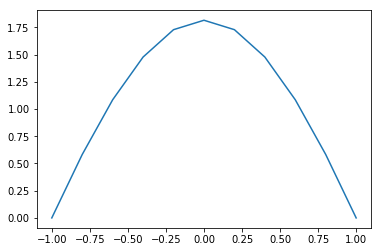

In [4]:
graph = find(n)
print(np.amax(graph[1]))
# plt.plot(graph[0], graph[1])
# plt.grid()
plt.show()

In [5]:
coeff = [lambda x: (1+(x ** 2)),
         lambda x: 0,
         lambda x: 1]
n = 10

0.9381523334362342


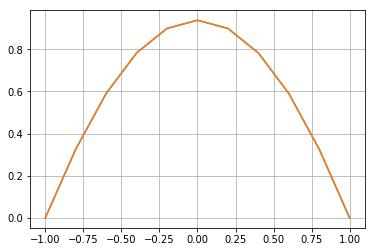

In [6]:
graph = find(n)
print(np.amax(graph[1]))
plt.plot(graph[0], graph[1])
plt.grid()
plt.show()